In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import cleaned data for diabetes and fastfood per county(FIPS) and year
diabetes_fastfood = 'diab_fastfood_clean_df.csv'
diabetes_fastfood_pd = pd.read_csv(diabetes_fastfood)

diabetes_fastfood_pd.head()

,Unnamed: 0,FIPS,State,County,% Diabetic,Population,Year,Diabetic Population,Restaurant Count
0,1,17001.0,Illinois,Adams,9.0,67054.0,2011,6035.0,31.0
1,2,17003.0,Illinois,Alexander,11.0,7914.0,2011,871.0,0.0
2,3,17005.0,Illinois,Bond,9.0,18103.0,2011,1629.0,7.0
3,4,17007.0,Illinois,Boone,7.0,54020.0,2011,3781.0,26.0
4,5,17009.0,Illinois,Brown,8.0,6591.0,2011,527.0,2.0


In [3]:
# Time for some exploration

county_stats = diabetes_fastfood_pd.groupby("County")
county_stats.mean()

,Unnamed: 0,FIPS,% Diabetic,Population,Year,Diabetic Population,Restaurant Count
County,,,,,,,
Adams,104.666667,17001.0,10.666667,66492.333333,2016.0,7080.333333,33.666667
Alexander,105.666667,17003.0,10.666667,7055.666667,2016.0,786.000000,0.333333
Bond,106.666667,17005.0,8.666667,17266.000000,2016.0,1502.000000,8.000000
Boone,107.666667,17007.0,8.666667,53811.000000,2016.0,4662.333333,24.666667
Brown,108.666667,17009.0,8.000000,6667.000000,2016.0,533.333333,3.000000
...,...,...,...,...,...,...,...
Whiteside,201.666667,17195.0,11.333333,57004.000000,2016.0,6423.333333,30.000000
Will,202.666667,17197.0,9.000000,687137.666667,2016.0,61860.666667,436.000000
Williamson,203.666667,17199.0,10.666667,66258.000000,2016.0,7074.666667,42.666667


In [4]:
# Spot check some counties
check_county = diabetes_fastfood_pd.loc[diabetes_fastfood_pd["County"].isin(['Adams', 'Alexander', 'Cook']), :]
check_county

,Unnamed: 0,FIPS,State,County,% Diabetic,Population,Year,Diabetic Population,Restaurant Count
0,1,17001.0,Illinois,Adams,9.0,67054.0,2011,6035.0,31.0
1,2,17003.0,Illinois,Alexander,11.0,7914.0,2011,871.0,0.0
15,16,17031.0,Illinois,Cook,9.0,5287037.0,2011,475833.0,4106.0
102,104,17001.0,Illinois,Adams,10.0,66988.0,2016,6699.0,34.0
103,105,17003.0,Illinois,Alexander,16.0,7492.0,2016,1199.0,1.0
117,119,17031.0,Illinois,Cook,10.0,5246456.0,2016,524646.0,4642.0
204,209,17001.0,Illinois,Adams,13.0,65435.0,2021,8507.0,36.0
205,210,17003.0,Illinois,Alexander,5.0,5761.0,2021,288.0,0.0
219,224,17031.0,Illinois,Cook,10.0,5150233.0,2021,515023.0,2889.0


In [6]:
# plot all counties by year for top populated counties
top_counties_dp = diabetes_fastfood_pd.nlargest(10, 'Population')
top_counties_dp 

,Unnamed: 0,FIPS,State,County,% Diabetic,Population,Year,Diabetic Population,Restaurant Count
15,16,17031.0,Illinois,Cook,9.0,5287037.0,2011,475833.0,4106.0
117,119,17031.0,Illinois,Cook,10.0,5246456.0,2016,524646.0,4642.0
219,224,17031.0,Illinois,Cook,10.0,5150233.0,2021,515023.0,2889.0
123,125,17043.0,Illinois,DuPage,8.0,932708.0,2016,74617.0,875.0
21,22,17043.0,Illinois,DuPage,8.0,932541.0,2011,74603.0,838.0
225,230,17043.0,Illinois,DuPage,7.0,922921.0,2021,64604.0,718.0
48,49,17097.0,Illinois,Lake,8.0,712567.0,2011,57005.0,530.0
150,152,17097.0,Illinois,Lake,9.0,705186.0,2016,63467.0,567.0
252,257,17097.0,Illinois,Lake,9.0,696535.0,2021,62688.0,430.0
302,307,17197.0,Illinois,Will,10.0,690743.0,2021,69074.0,366.0


In [7]:
top_counties = top_counties_dp["County"].unique()
top_counties

array(['Cook', 'DuPage', 'Lake', 'Will'], dtype=object)

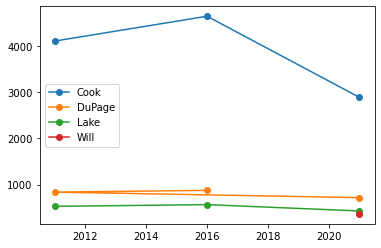

In [8]:
county_by_year = pd.DataFrame()

# plt.plot(years, fast_food)


for county in top_counties:
    county_by_year = top_counties_dp.loc[top_counties_dp["County"] == county, :]

    years = county_by_year["Year"]
    fast_food = county_by_year["Restaurant Count"]
    plt.plot(years, fast_food, label=county, marker='o')
plt.legend()
plt.show()


In [ ]:
# We need to sort the years...